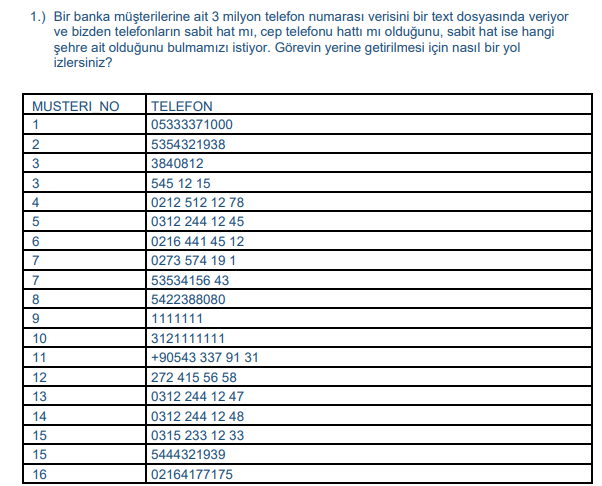

In [3]:
from PIL import Image

im = Image.open(r"C:\Users\LENOVO\Desktop\İş_Mülakat_Dosyaları\Sade_Yazilim_Calisma\Soru_Cevaplari_Kodlari\Screenshot_1.png") 

im

### - Ilk once ornegi olusturmak adina bir txt file ile tabloda verilenleri kaydettim

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('Tel_No.txt', sep="\t")
df["TELEFON"] = df["TELEFON"].str.replace(" ","")
df

,MUSTERI_NO,TELEFON
0,1,05333371000
1,2,5354321938
2,3,3840812
3,3,5451215
4,4,02125121278
5,5,03122441245
6,6,02164414512
7,7,0273574191
8,7,5353415643
9,8,5422388080


### - Daha sonra soyle bir yol izledim. Sabit hatlar 11 haneden olusu ve basinda '05' gibi bir baslangici olmaz. Bizim bu ayrimi yapabilmemiz gerekiyor

### - Bir dongu ile telefon no icerisinde gezerek eger ki 11 hane ve '05' ile baslamiyorsa bunu sabit hatlar listesine eklemesini, degilse cep tel icerisine eklmesini soyledim

In [2]:
sabit_hatlar = []
cep_tel = []

for i in df["TELEFON"]:
    if len(i) == 11 and i.startswith("05") is False:
        sabit_hatlar.append(i)
    else:
        cep_tel.append(i)

### - Ardindan bunu bir pandas serisi haline getiriyoruz ve basindaki 0 kaldiriyoruz.

In [3]:
sabit_hatlar = pd.Series(sabit_hatlar).str.replace("0","")

hatlar = []
for i in sabit_hatlar:
    hatlar.append(i)
    
hatlar

['2125121278',
 '3122441245',
 '2164414512',
 '3122441247',
 '3122441248',
 '3152331233',
 '2164177175']

### - Burada internetten edindigim bir veriyi yukluyorum. Iller ve alan kodlari var.

In [4]:
sehir_hatlari = pd.read_excel("Sabit_Hatlar.xlsx")
sehir_hatlari.head(3)

,İl,Telefon Kodu
0,Adana,322
1,Adıyaman,416
2,Afyon,272


### - Elimizdeki sabit hatlarin hangi sehirlere ait oldugunu bulmak icin ilk once hatlarin icerisinde ardindan internetten edindigim alan kodulari icerisinde geziniyorum.

### - Sabit hattin ilk 3 degerini telefon alan kodu ile karsilastiriyorum cunku alan kodlarinin 3 hanesi vardir onlarla tanimlanirlar.

### - Elimizdeki uyusan alan kodu ile sabit hat numarsini bir listeye atiyorum.

In [5]:
tr_illeri = []


for i in hatlar:
    for j in sehir_hatlari["Telefon Kodu"].values:
        if int(i[:3]) == j:
            tr_illeri.append(i)

### - Lakin bu sabit hat telefonlarindan bir tanesi hicbir il ile uyusmuyor bu da onun farkli bir ulkenin alan kodu oldugunu gosteriyor.

In [6]:
# Turkiye de olmayan kayitli sabit hat

set1=set(tr_illeri)
set2=set(hatlar)
set2.difference(set1)

{'3152331233'}

### - Son olarak elimizdeki sabit hatlarin hangi sehir oldugunu karsislatirmadan buluyorum ve karsilik gelen sehirin kendisini ayri yere, sabit hattin kendisini ayri yere gonderiyorum.

In [7]:
iller = []
tr_illeri = []

for i in hatlar:
    for j in sehir_hatlari["Telefon Kodu"].values:
        if int(i[:3]) == j:
            iller.append(sehir_hatlari[sehir_hatlari["Telefon Kodu"] == int(i[:3])]["İl"].values[0])
            tr_illeri.append(i)
        
            

### - Bu sekilde sabit hatlarin karsilik geldigi sehirler ve kendisini bir dataframe ile birlestiriyorum.

In [8]:
df = pd.DataFrame(np.array(iller),columns=["Sehiler"])
df["Telefon_Kodlari"] = np.array(tr_illeri)
df

,Sehiler,Telefon_Kodlari
0,İstanbul (Avrupa Yakası),2125121278
1,Ankara,3122441245
2,İstanbul (Anadolu Yakası),2164414512
3,Ankara,3122441247
4,Ankara,3122441248
5,İstanbul (Anadolu Yakası),2164177175
